<font size=6, font color=blue>**PA005: Customer Clustering**

# Solution Planning

## Input

- Business Problem
    * Select most valuable customers to create a loyalty program called Insiders


- Data
    * One year of e-commerce sales

## Output

* A list of customers that will be part of Insiders
* A report answering business questions
    1. Who are the eligible customers to participate in the Insiders program? 
    2. How many customers will be part of the program?
    3. What are the main characteristics of these customers? 
    4. What revenue percentage comes from Insiders?
    5. What is the Insiders' expected revenue for the coming months?
    6. What are the conditions for a customer to be eligible for the Insiders program? 
    7. What are the conditions for a customer to be removed from the Insiders program?
    8. What is the guarantee that the Insiders program is better than the regular customer database? 
    9. What actions can the marketing team make to increase the revenue?

## Tasks

* A report answering business questions:
    1. Who are the eligible customers to participate in the Insiders program?
        - Understand the criteria to a eligible customer. 
        - Criteria examples:
            * Revenue
                * High average ticket
                * High LTV (lifetime value)
                * Low recency
                * High basket size
                * Low churn probability
            * Expenses
                * Return rate
            * Buying Experience
                * High average notes on reviews<br><br>
                
    2. How many customers will be part of the program?
        - Calculate the percentage of customers that belong to Insiders program over the total number of customers.<br><br>
                
    3. What are the main characteristics of these customers? 
        - Indicate customer characteristics:
            * Age
            * City
            * Education level
            * Localization, etc.
        - Indicate consumption characteristics:
            * Clusters attributes<br><br>
                
    4. What revenue percentage comes from Insiders?
        - Calculate the percentage of Insiders revenue over the total revenue.<br><br>
                
    5. What is the Insiders' expected revenue for the coming months?
        - Calculate Insiders' LTV
        - Calculate Cohort Analysis.<br><br>
        
    6. What are the conditions for a customer to be eligible for the Insiders program? 
        - Define verification periodicity (monthly, quarterly, etc.) 
        - The customer must be similar to a customer on Insiders.<br><br>
                
    7. What are the conditions for a customer to be removed from the Insiders program?
        - Define verification periodicity (monthly, quarterly, etc.) 
        - The customer must be dissimilar to a customer on Insiders.<br><br>
            
    8. What is the guarantee that the Insiders program is better than the regular customer database? 
        - Perform A/B Test
        - Perform A/B Bayesian Test  
        - Perform Hypothesis Test <br><br>
                        
    9. What actions can the marketing team make to increase the revenue?
        - Discount
        - Buying preferences
        - Shipping options
        - Promote a visit to the company, etc.

* Solution Benchmark
    - Desk Research <br>
        <font color=red>* INSERIR EXEMPLOS APLICADOS NO MERCADO </font><br>
        * 

# Imports

In [89]:
import numpy   as np
import pandas  as pd
import seaborn as sns

from IPython.core.display  import HTML
from matplotlib            import pyplot           as plt
from plotly                import express          as px

from yellowbrick.cluster   import KElbowVisualizer 
from sklearn               import cluster          as c
from sklearn               import metrics          as sm

## Helper Functions

In [90]:
def personal_settings():
    # plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
        
    # notebook settings
    display(HTML('<style>.container{width:90% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)

        
    # seaborn settings
    sns.set(rc={'figure.figsize':(20,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.5)

In [91]:
personal_settings()

## Load Dataset

In [92]:
df_raw = pd.read_csv(r'../data/raw/ecommerce.csv', encoding='unicode_escape')
display(df_raw.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN


In [93]:
# drop 'unnamed: 8' column
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis =1)

# Data Description

In [94]:
df2 = df_raw.copy()

## Rename Columns

In [95]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [96]:
cols_new = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price','customer_id','country']
df2.columns = cols_new
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


## Data Dimensions

In [97]:
print('Number of rows: {}'.format(df2.shape[0]))
print('Number of cols: {}'.format(df2.shape[1]))

Number of rows: 541909
Number of cols: 8


## Data Types

In [98]:
print(df2.dtypes)
display(df2.head())

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


## Check NA

In [99]:
df2.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [100]:
# c01 metrics - removing NA
df2 = df2.dropna(subset=['description','customer_id'])
print ('Removed data: {:.2f}'.format(1 - df2.shape[0]/df_raw.shape[0]))
print('Remaining rows: {}'.format(df2.shape[0]))

df2.isna().sum()

Removed data: 0.25
Remaining rows: 406829


invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Change dtypes

In [101]:
print(df2.dtypes)
display(df2.head())

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


In [102]:
# checking 'invoice_no' by forcing change to integer
df2['invoice_no'] =df2['invoice_no'].astype(int)

# note: error indicates that this feature also has letters, therefore must remain as 'object'

ValueError: invalid literal for int() with base 10: 'C536379'

In [ ]:
# changing 'invoice_date' format
df2['invoice_date'] = pd.to_datetime (df2['invoice_date'], format='%d-%b-%y')
df2.head()

In [ ]:
# changing 'customer_id' by forcing change to integer
df2['customer_id'] = df2['customer_id'].astype('int64')
df2.head()

In [ ]:
# checking final dtypes
df2.dtypes

## Descriptive Statistics

In [ ]:
# c01 metrics - nothing

# Feature Engineering

In [ ]:
df3 = df2.copy()

## Feature Creation

In [ ]:
# data reference
df_ref = df3.drop(['invoice_no','stock_code','description','quantity','invoice_date','unit_price','country'],
                  axis=1).drop_duplicates(ignore_index=True)
print('Data reference shape:', df_ref.shape)
df_ref.head()

In [ ]:
# === MONETARY 

# creating 'gross_revenue' (= quantity * price)
df3['gross_revenue'] = df3['quantity']*df3['unit_price']

# creating 'monetary'
df_monetary = df3[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()

# merging dataframes
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

In [ ]:
# === RECENCY (last day of purchase)
df_recency = df3[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df3['invoice_date'].max() - df_recency['invoice_date']).dt.days # dt vectorize the series to apply 'days' command
df_recency = df_recency[['customer_id','recency_days']].copy()

# merging dataframes
df_ref = pd.merge(df_ref, df_recency, on='customer_id',how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

In [ ]:
# === FREQUENCY (number of purchases)
df_freq = df3[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_freq = df_freq.rename(columns={'customer_id': 'customer_id','invoice_no': 'invoice_freq'}) # changing columns names

# merging dataframes
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

In [ ]:
df_ref.head()

# Variable Filtering

In [103]:
df4 = df_ref.copy()

# EDA (Exploratory Data Analysis)

In [104]:
df5 = df4.copy()

# Data Preparation

In [105]:
df6 = df5.copy()

# Feature Selection

In [106]:
df7 = df6.copy()

# Hypermarameter Fine-Tunning

In [107]:
df8 = df7.copy()
X = df8.drop(columns=['customer_id'])
X.head()

,gross_revenue,recency_days,invoice_freq
0,5288.63,302,35
1,3079.10,31,18
2,7187.34,2,18
3,948.25,95,5
4,635.10,330,6


In [108]:
clusters = [2,3,4,5,6]

## Within-Cluster Sum of Square (WSS)

[100161464120.90073, 52830442008.006966, 39986557693.70814, 22956286930.93181, 19974463394.768776]


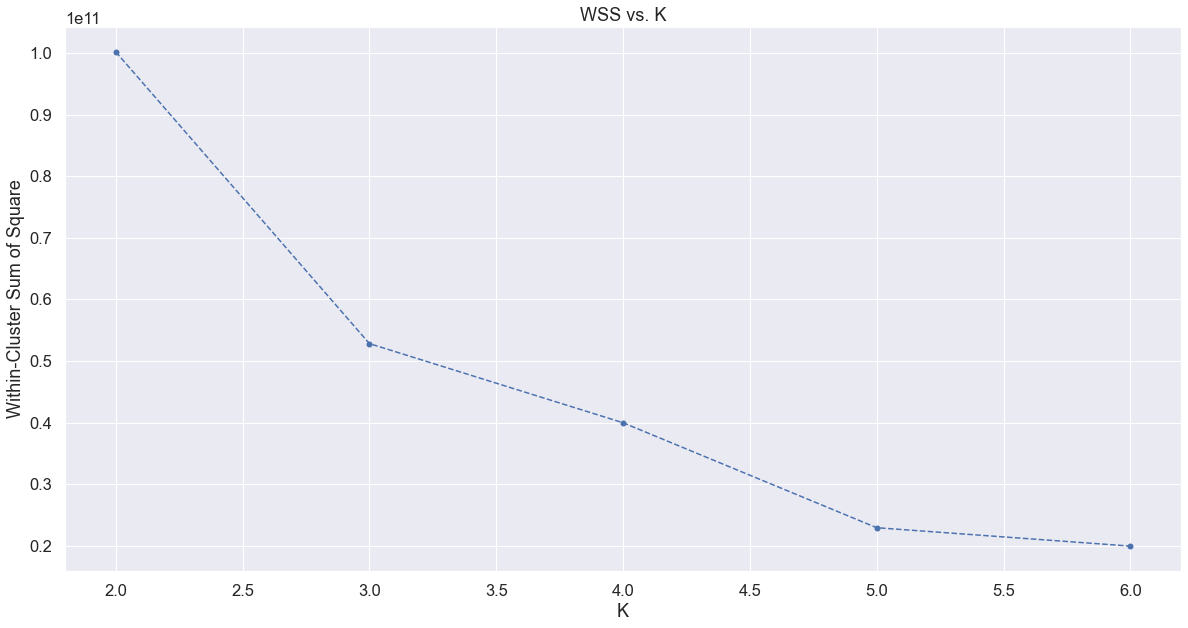

In [109]:
wss = []

for k in clusters:
    # model definition
    kmeans = c.KMeans(init='random', 
                      n_clusters=k, 
                      n_init=10, # init random inicia o centroide aleatoriamente, n_init 
                      max_iter=300, 
                      random_state=42) # random state define um estado aleatório fixo
    
    # model training
    kmeans.fit(X)
    
    # validation
    wss.append(kmeans.inertia_) # generates a wss value for each k
    
# wss plot - elbow method
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K') # number of clusters
plt.ylabel('Within-Cluster Sum of Square')
plt.title('WSS vs. K')

print(wss)

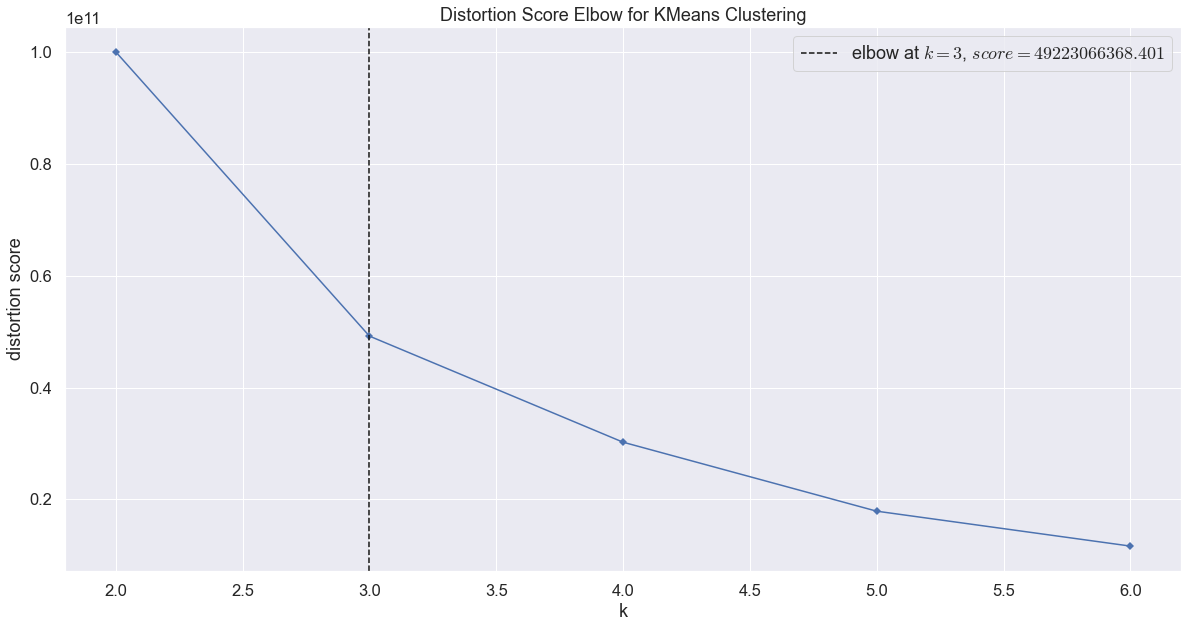

In [110]:
# yellow brick

kmeans_y = KElbowVisualizer(c.KMeans(), k=clusters, timings=False);
kmeans_y.fit(X);
kmeans_y.show();





















## Silhoute Score

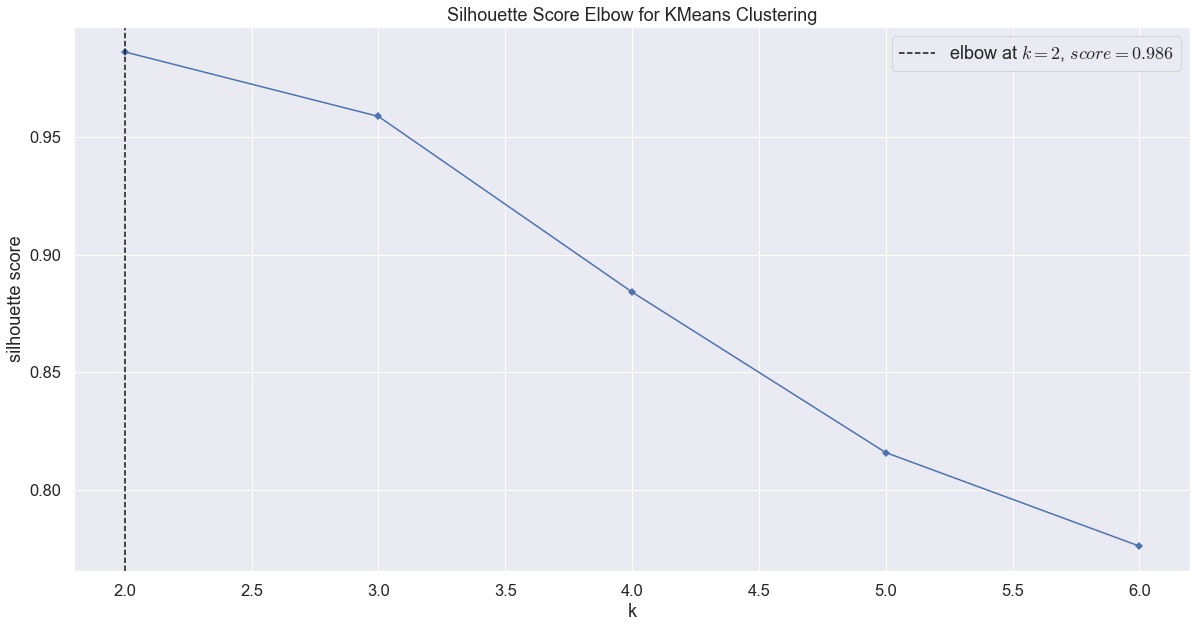

In [111]:
# yellow brick

kmeans_y = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False);
kmeans_y.fit(X);
kmeans_y.show();

# Model training

In [112]:
df9 = df8.copy()

## K-Means

In [113]:
# model definition
k = 3
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(X)

# model clustering
# labels = kmeans.predict(X) # another way
labels = kmeans.labels_
print(labels)

[0 0 0 ... 0 0 0]


## Cluster Validation

In [114]:
# WSS 
print('WSS value: {}'.format(kmeans.inertia_))

# SS 
print('SS value:  {}'.format(sm.silhouette_score(X, labels, metric='euclidean')))

WSS value: 52830442008.006966
SS value:  0.9494677566681542


# Cluster Analysis

In [115]:
df10=df9.copy()
df10['clusters'] = labels
df10.head()

,customer_id,gross_revenue,recency_days,invoice_freq,clusters
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,0
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,0
4,15100,635.10,330,6,0


## Visualization Inspection

In [117]:
fig = px.scatter_3d(df10, x='recency_days', y='invoice_freq', z='gross_revenue', color='clusters')
fig.show()

## Cluster Profile

In [118]:
# number of customers on each cluster
df_cluster = df10[['customer_id','clusters']].groupby('clusters').count().reset_index()
df_cluster['customer_percentage'] = (df_cluster['customer_id'] / df_cluster['customer_id'].sum())*100

# avg gross_revenue
df_avg_grossrevenue = df10[['gross_revenue','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_grossrevenue, how='inner', on='clusters')

# avg recency_days
df_avg_recencydays = df10[['recency_days','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recencydays, how='inner', on='clusters')

# avg incoive_freq
df_avg_invoicefreq = df10[['invoice_freq','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoicefreq, how='inner', on='clusters')

df_cluster.sort_values('gross_revenue', ascending=False)

,clusters,customer_id,customer_percentage,gross_revenue,recency_days,invoice_freq
1,1,6,0.14,182181.98,7.17,89.00
2,2,31,0.71,40543.52,13.29,53.29
0,0,4335,99.15,1372.58,92.26,4.61


### <font color=red> Cluster 01:  Insiders
    - Number of Customers:: 6 (0.14% of total of customers)
    - Avg Recency Days: 7 
    - Avg Quantity of Invoices: 89
    - Avg Gross Revenue: $182.182,00
        
###  <font color=red> Cluster 02:
    - Number of Customers: 31 (0.71% of total of customers)
    - Avg Recency Days: 14 
    - Avg Quantity of Invoices: 53
    - Avg Gross Revenue: $40.543,52 

### <font color=red>  Cluster 00:
    - Number of Customers: 4.335 (99,15% of total of customers)
    - Avg Recency Days: 92
    - Avg Quantity of Invoices: 5
    - Avg Gross Revenue: $1.372,57

# Deploy to Production